In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import seaborn as sns
from scipy.stats import pearsonr
import numpy as np

#  Import and read the sales data
url = 'https://raw.githubusercontent.com/rbono22/Retail_Analysis/main/Resources/cleaned_datasets/final_cleaned_dataset.csv'
CPI_df = pd.read_csv(url, index_col=0)
CPI_df


,type,size,dept,date,weekly_sales,temperature,fuel_price,cpi,inflation,dspi,unemployment,isholiday
store,,,,,,,,,,,,
6,A,202505,91.0,2010-06-04,47689.17,79.44,2.705,212.698244,1.640043,11319.4,7.092,f
6,A,202505,91.0,2010-06-11,48320.06,81.81,2.668,212.983599,1.640043,11319.4,7.092,f
6,A,202505,91.0,2010-06-18,48363.68,83.89,2.637,212.981384,1.640043,11319.4,7.092,f
6,A,202505,91.0,2010-06-25,44107.29,84.20,2.653,212.864141,1.640043,11319.4,7.092,f
6,A,202505,91.0,2010-07-02,48001.02,80.34,2.669,212.746898,1.640043,11347.8,6.973,f
...,...,...,...,...,...,...,...,...,...,...,...,...
6,A,202505,91.0,2010-04-30,40862.69,68.91,2.780,211.894272,1.640043,11213.1,7.092,f
6,A,202505,91.0,2010-05-07,44355.27,73.68,2.835,211.844271,1.640043,11305.7,7.092,f
6,A,202505,91.0,2010-05-14,43757.60,74.95,2.854,211.842177,1.640043,11305.7,7.092,f


In [2]:
#drop NA values 
CPI_df = CPI_df.dropna()
CPI_df

,type,size,dept,date,weekly_sales,temperature,fuel_price,cpi,inflation,dspi,unemployment,isholiday
store,,,,,,,,,,,,
6,A,202505,91.0,2010-06-04,47689.17,79.44,2.705,212.698244,1.640043,11319.4,7.092,f
6,A,202505,91.0,2010-06-11,48320.06,81.81,2.668,212.983599,1.640043,11319.4,7.092,f
6,A,202505,91.0,2010-06-18,48363.68,83.89,2.637,212.981384,1.640043,11319.4,7.092,f
6,A,202505,91.0,2010-06-25,44107.29,84.20,2.653,212.864141,1.640043,11319.4,7.092,f
6,A,202505,91.0,2010-07-02,48001.02,80.34,2.669,212.746898,1.640043,11347.8,6.973,f
...,...,...,...,...,...,...,...,...,...,...,...,...
6,A,202505,91.0,2010-04-30,40862.69,68.91,2.780,211.894272,1.640043,11213.1,7.092,f
6,A,202505,91.0,2010-05-07,44355.27,73.68,2.835,211.844271,1.640043,11305.7,7.092,f
6,A,202505,91.0,2010-05-14,43757.60,74.95,2.854,211.842177,1.640043,11305.7,7.092,f


In [3]:
#encode 'isHoliday' 
CPI_df["isholiday"] = CPI_df["isholiday"].map({'f': 0 ,'t': 1})
CPI_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,type,size,dept,date,weekly_sales,temperature,fuel_price,cpi,inflation,dspi,unemployment,isholiday
store,,,,,,,,,,,,
6,A,202505,91.0,2010-06-04,47689.17,79.44,2.705,212.698244,1.640043,11319.4,7.092,0
6,A,202505,91.0,2010-06-11,48320.06,81.81,2.668,212.983599,1.640043,11319.4,7.092,0
6,A,202505,91.0,2010-06-18,48363.68,83.89,2.637,212.981384,1.640043,11319.4,7.092,0
6,A,202505,91.0,2010-06-25,44107.29,84.20,2.653,212.864141,1.640043,11319.4,7.092,0
6,A,202505,91.0,2010-07-02,48001.02,80.34,2.669,212.746898,1.640043,11347.8,6.973,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6,A,202505,91.0,2010-04-30,40862.69,68.91,2.780,211.894272,1.640043,11213.1,7.092,0
6,A,202505,91.0,2010-05-07,44355.27,73.68,2.835,211.844271,1.640043,11305.7,7.092,0
6,A,202505,91.0,2010-05-14,43757.60,74.95,2.854,211.842177,1.640043,11305.7,7.092,0


In [4]:
# Seperate by store
CPI_df['Store'] = CPI_df.index 

#reset index
CPI_df = CPI_df.reset_index(drop=True)
CPI_df 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,type,size,dept,date,weekly_sales,temperature,fuel_price,cpi,inflation,dspi,unemployment,isholiday,Store
0,A,202505,91.0,2010-06-04,47689.17,79.44,2.705,212.698244,1.640043,11319.4,7.092,0,6
1,A,202505,91.0,2010-06-11,48320.06,81.81,2.668,212.983599,1.640043,11319.4,7.092,0,6
2,A,202505,91.0,2010-06-18,48363.68,83.89,2.637,212.981384,1.640043,11319.4,7.092,0,6
3,A,202505,91.0,2010-06-25,44107.29,84.20,2.653,212.864141,1.640043,11319.4,7.092,0,6
4,A,202505,91.0,2010-07-02,48001.02,80.34,2.669,212.746898,1.640043,11347.8,6.973,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,A,202505,91.0,2010-04-30,40862.69,68.91,2.780,211.894272,1.640043,11213.1,7.092,0,6
421566,A,202505,91.0,2010-05-07,44355.27,73.68,2.835,211.844271,1.640043,11305.7,7.092,0,6
421567,A,202505,91.0,2010-05-14,43757.60,74.95,2.854,211.842177,1.640043,11305.7,7.092,0,6
421568,A,202505,91.0,2010-05-21,44153.33,74.80,2.826,212.127532,1.640043,11305.7,7.092,0,6


Text(0.5, 1.0, 'Lineplot showing the change in Weekly_Sales in each month over the span of 3 years')

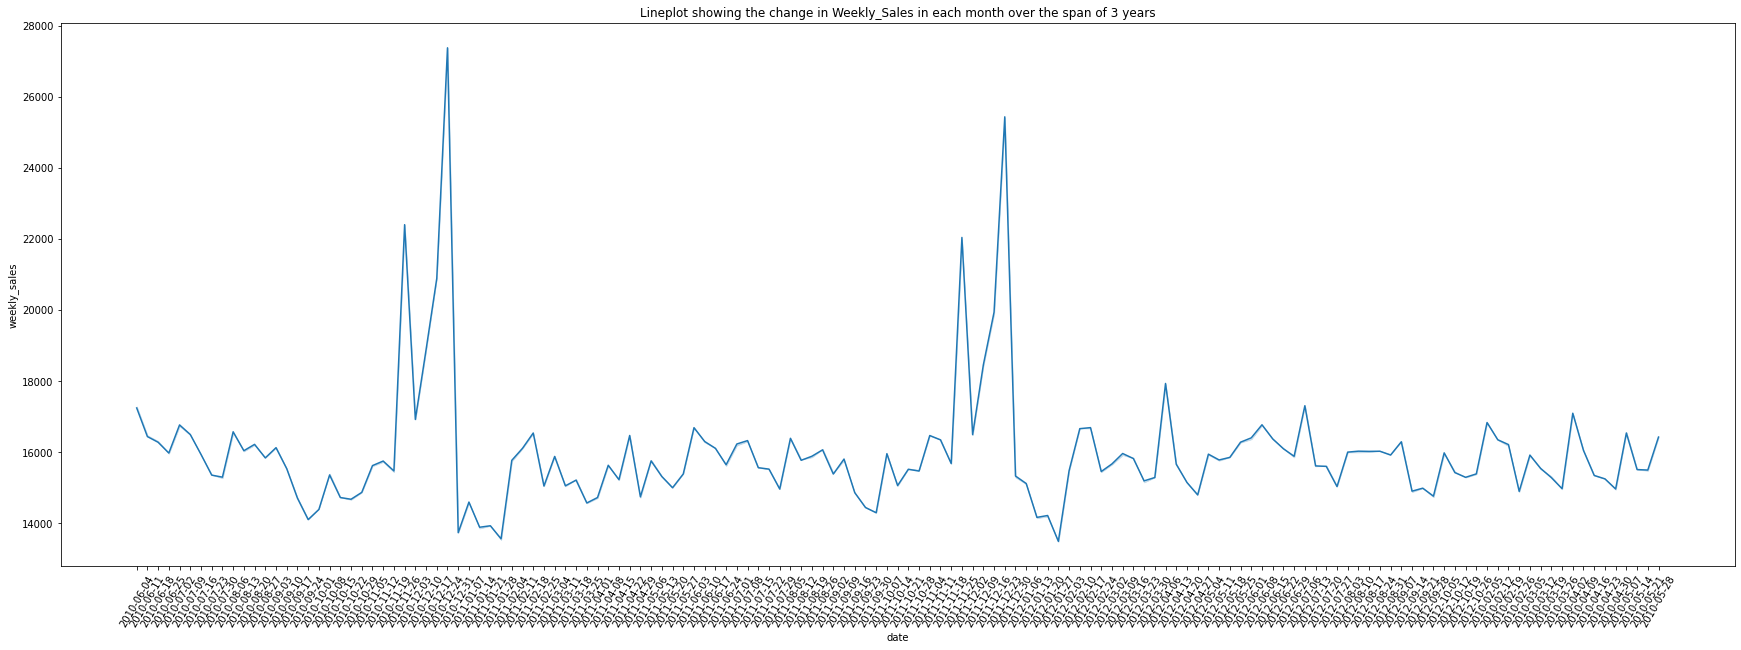

In [5]:

fig,ax = plt.subplots(figsize = (30,10))
sns.lineplot(data=CPI_df, x = 'date', y = 'weekly_sales', ci = 1, sort=True)
plt.xticks(rotation = 60)
plt.title('Lineplot showing the change in Weekly_Sales in each month over the span of 3 years')


Text(0.5, 1.0, 'Lineplot showing the change in cpi in each month over the span of 3 years')

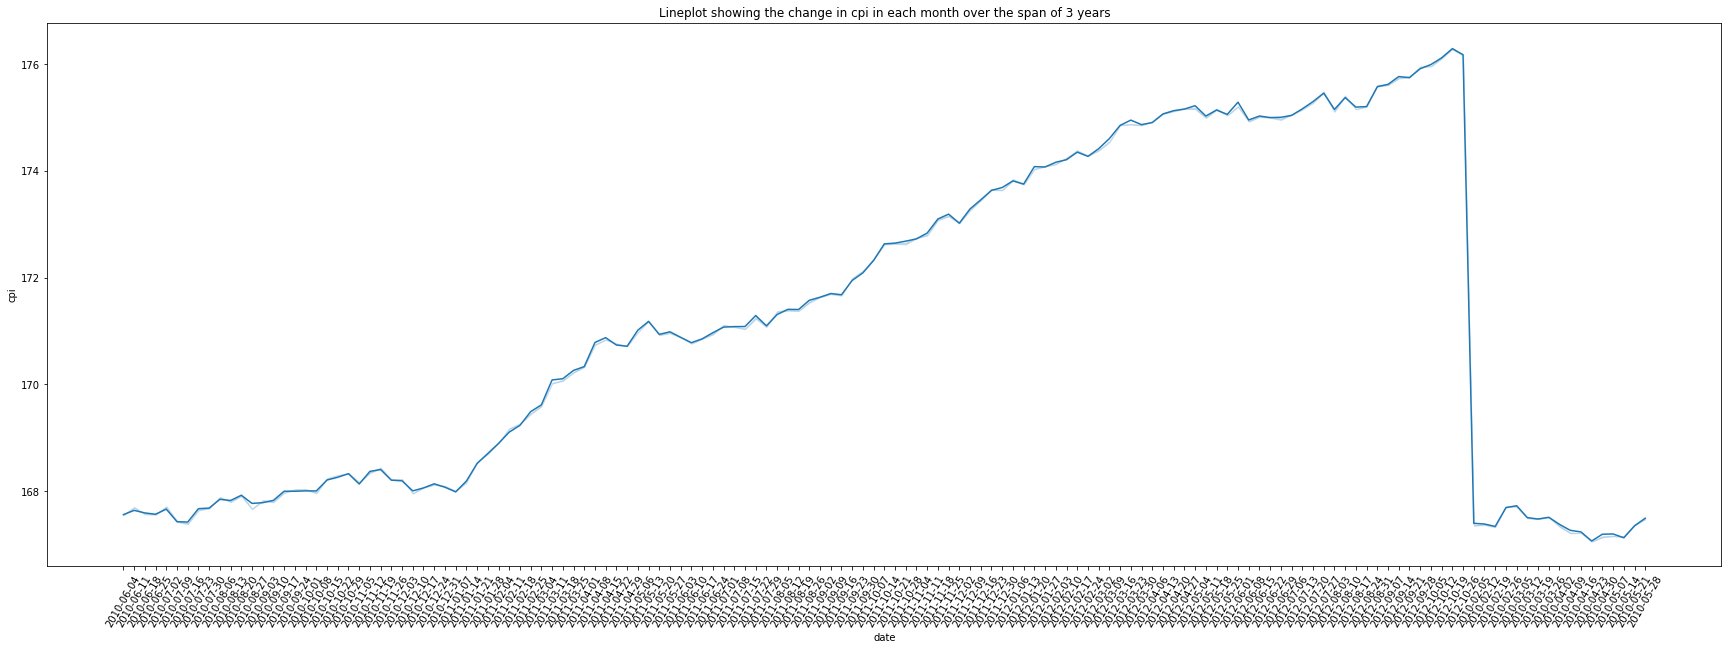

In [6]:

fig,ax = plt.subplots(figsize = (30,10))
sns.lineplot(data = CPI_df, x = 'date', y = 'cpi', ax = ax, ci = 1)
plt.xticks(rotation = 60)
plt.title('Lineplot showing the change in cpi in each month over the span of 3 years')


In [7]:
#aggregate per store monthly sales 

#seperate date into month and year columns
CPI_df['Month'] = CPI_df.date.apply(lambda x: x.split('-')[1])
CPI_df['Year'] = CPI_df.date.apply(lambda x: x.split('-')[0])
CPI_df['Month_year'] = CPI_df.date.apply(lambda x: x.split('-')[:-1])

#aggregate total sales per month per year broken down by store 
CPI_agg_df = CPI_df.groupby([CPI_df['Store'], CPI_df['Year'], CPI_df['Month']]).sum('weekly_sales')

#rename column
CPI_agg_df['monthly_sales'] = CPI_agg_df['weekly_sales']
CPI_agg_df = CPI_agg_df.drop(['weekly_sales'], axis=1).reset_index()
CPI_agg_df['Year_month'] =CPI_agg_df['Year'].astype(str) + ' , ' + CPI_agg_df['Month'].astype(str).str.zfill(2)
CPI_agg_df

,Store,Year,Month,size,dept,temperature,fuel_price,cpi,inflation,dspi,unemployment,isholiday,monthly_sales,Year_month
0,1,2010,02,43881350,12642.0,12133.60,739.126,61258.592095,475.612598,3209198.0,2350.740,72,6307344.10,"2010 , 02"
1,1,2010,03,43881350,12673.0,15247.33,778.860,61260.172136,475.612598,3223640.0,2350.740,0,5871293.98,"2010 , 03"
2,1,2010,04,54624715,15792.0,23587.17,1001.582,76009.490662,592.055683,4047929.1,2818.688,0,7422801.92,"2010 , 04"
3,1,2010,05,42973460,12476.0,21589.36,800.558,59794.742184,465.772338,3210818.8,2217.472,0,5929938.64,"2010 , 05"
4,1,2010,06,42368200,12233.0,23062.57,746.493,59179.586416,459.212164,3169432.0,2186.240,0,6084081.46,"2010 , 06"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,45,2012,06,39722256,14605.0,24211.90,1217.602,64190.720761,695.297321,4186761.6,2878.512,0,4049712.68,"2012 , 06"
1481,45,2012,07,31328565,11550.0,21130.40,941.731,50657.109459,548.374375,3279878.5,2301.260,0,3042463.41,"2012 , 07"
1482,45,2012,08,39958698,14670.0,25600.74,1276.318,64649.934897,699.435996,4181296.6,2935.192,0,3633793.89,"2012 , 08"
1483,45,2012,09,32037891,11801.0,18564.85,1076.619,51973.443229,560.790399,3379044.8,2353.364,69,2905011.08,"2012 , 09"


In [8]:
#standerdize monthly sales per store
applicable = ['temperature', 'fuel_price', 'cpi', 'inflation', 'dspi', 'unemployment', 'monthly_sales']
# not_applicable = ['Store', 'size', 'isholiday']

for store in CPI_agg_df.Store.unique(): 
  mask = (CPI_agg_df['Store'] == store) 
  to_change = CPI_agg_df.loc[mask.values, applicable].copy() 
  CPI_agg_df.loc[mask, applicable] = (to_change - to_change.mean()) / to_change.std()

CPI_agg_df

,Store,Year,Month,size,dept,temperature,fuel_price,cpi,inflation,dspi,unemployment,isholiday,monthly_sales,Year_month
0,1,2010,02,43881350,12642.0,-1.791497,-1.508865,-0.771287,-1.107187,-1.097531,-0.039956,72,-0.477826,"2010 , 02"
1,1,2010,03,43881350,12673.0,-1.174771,-1.278338,-0.771077,-1.107187,-1.063949,-0.039956,0,-0.959982,"2010 , 03"
2,1,2010,04,54624715,15792.0,0.477071,0.013838,1.193122,-0.580448,0.852787,1.534771,0,0.755573,"2010 , 04"
3,1,2010,05,42973460,12476.0,0.081372,-1.152452,-0.966231,-1.151700,-1.093762,-0.488427,0,-0.895136,"2010 , 05"
4,1,2010,06,42368200,12233.0,0.373166,-1.466123,-1.048153,-1.181375,-1.190000,-0.593528,0,-0.724695,"2010 , 06"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,45,2012,06,39722256,14605.0,1.407092,1.255294,1.566132,0.081944,1.733636,1.240799,0,1.033463,"2012 , 06"
1481,45,2012,07,31328565,11550.0,0.816709,-0.325034,-0.599826,-0.616732,-0.440466,-0.788783,0,-0.583446,"2012 , 07"
1482,45,2012,08,39958698,14670.0,1.673179,1.591648,1.639625,0.101625,1.720535,1.440082,0,0.365800,"2012 , 08"
1483,45,2012,09,32037891,11801.0,0.325176,0.447672,-0.389156,-0.557689,-0.202731,-0.605588,69,-0.804094,"2012 , 09"


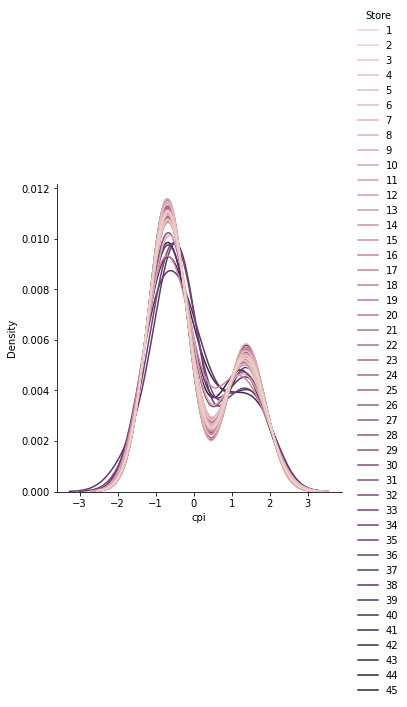

In [9]:
#plot CPI_agg_df vs. cpi
sns.displot(data=CPI_agg_df, x='cpi', hue='Store', kind='kde')
plt.show()

In [10]:
#Create random forest model

# create features and target variables 
X = CPI_agg_df.drop(['size','dept', 'monthly_sales', 'Year_month'], axis=1)
y = CPI_agg_df['monthly_sales']

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [11]:
#create the model
regressor = RandomForestRegressor(n_estimators = 200, min_weight_fraction_leaf=.05, random_state=78)

#fit the model with the training data 
regressor.fit(X_train, y_train)

# Evaluate the model
y_pred = regressor.predict(X_test)
print(f"Random forest train predictive r2 score: {r2_score(y_train,regressor.predict(X_train)):.3f}")
print(f"Random forest test predictive r2 score: {r2_score(y_test,y_pred):.3f}")

#use feasture importances to identify the weight of each feature vs. target
print(dict(zip(X_train.columns, regressor.feature_importances_)))

Random forest train predictive r2 score: 0.814
Random forest test predictive r2 score: 0.839
{'Store': 0.004877623239619238, 'Year': 0.00011998031122159542, 'Month': 0.1277109426758906, 'temperature': 0.05789580167318127, 'fuel_price': 0.0022157765429010614, 'cpi': 0.6809564780357278, 'inflation': 0.0015987831976844588, 'dspi': 0.10941248324910545, 'unemployment': 0.013830298854496381, 'isholiday': 0.001381832220172049}


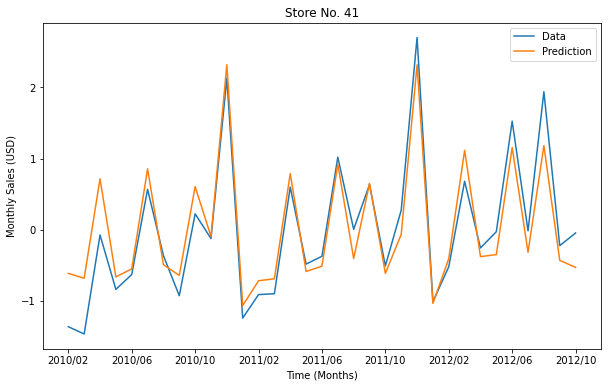

In [12]:
original_df = CPI_agg_df.copy()

# This one is to put the prediction into units
specific = original_df[original_df['Store'] == 41].sort_values(['Year', 'Month'], ascending=True).copy()

specific['date'] = specific['Year'] + '/' + specific['Month']

# This is used to feed the model and predict in standardized units
specific_std = CPI_agg_df[CPI_agg_df['Store'] == 41].sort_values(['Year', 'Month'], ascending=True).copy()

specific_std['date'] = specific_std['Year'] + '/' + specific_std['Month']

# Predict the store timeseries
to_predict = specific_std.drop(['size','dept', 'monthly_sales', 'date', 'Year_month'], axis=1).copy()

std = regressor.predict(to_predict)

# Convert them to units
std = std * specific['monthly_sales'].std() + specific['monthly_sales'].mean()

fig, ax = plt.subplots(figsize=(10, 6))

# plot it
plt.plot(specific['monthly_sales'].values, label='Data')
plt.plot(std, label='Prediction')
plt.title('Store No. 41')
plt.ylabel('Monthly Sales (USD)')
plt.xlabel('Time (Months)')
plt.xticks(ticks=np.arange(len(specific))[::4], labels=specific['date'].values[::4])
plt.legend()
plt.show()

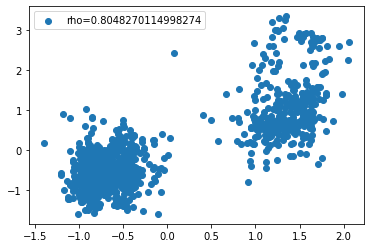

In [13]:
#plot cpi and target 
corr = pearsonr(X_train['cpi'].values, y_train)[0]

plt.scatter(X_train['cpi'].values, y_train, label=f'rho={corr}')
plt.legend()
plt.show()

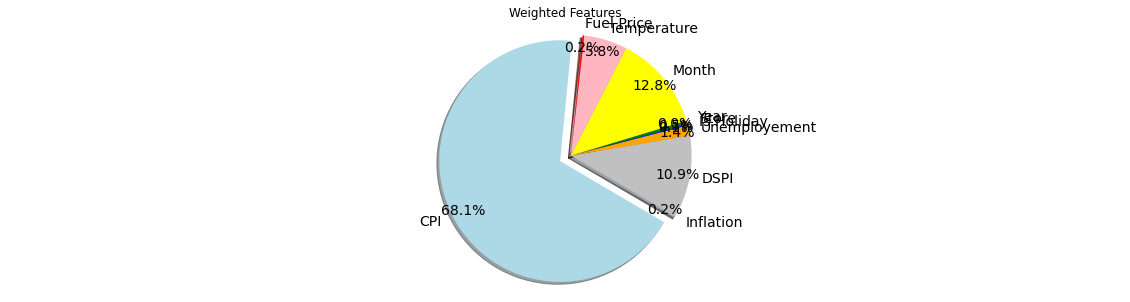

In [14]:
import matplotlib.pyplot as plt

my_data = regressor.feature_importances_

my_labels = ['Store', 'Year', 'Month', 'Temperature', 'Fuel Price', 'CPI', 'Inflation', 'DSPI', 'Unemployement', 'Is Holiday']
my_colors = ['green', 'purple', 'yellow', 'lightpink', 'red', 'lightblue','lightsteelblue','silver', 'orange', 'blue']
my_explode = (0, 0, 0, 0, 0, 0.1, 0, 0, 0, 0)
fig = plt.figure(figsize=[20, 5])
plt.pie(my_data,labels=my_labels,autopct='%1.1f%%',
        labeldistance=1.1, 
        startangle=15, 
        shadow = True, 
        colors=my_colors, 
        pctdistance=0.9, 
        explode=my_explode, 
        textprops={'fontsize': 14})
plt.title('Weighted Features')
plt.axis('equal')
plt.show()